# Small Vocabulary Speech Recognition for Chhattisgarhi

In [9]:
from dtw import *
import matplotlib.pyplot as plt
import numpy as np
import librosa
import IPython.display
from IPython.display import Image
import librosa.display
from scipy.spatial.distance import cdist
import copy
%matplotlib inline

## MFCC Calculation for Training Audio Files

In [10]:
import os
import time
def preprocess_mfcc(mfcc):
    mfcc_cp = copy.deepcopy(mfcc)
    for i in range(mfcc.shape[1]):
        mfcc_cp[:,i] = mfcc[:,i] - np.mean(mfcc[:,i])
        mfcc_cp[:,i] = mfcc_cp[:,i]/np.max(np.abs(mfcc_cp[:,i]))
    return mfcc_cp
dirname = "train3"
files = [f for f in os.listdir(dirname) if not f.startswith('.')]
files = files[1:]
print(files)

mfcc_arr = []
start = time.perf_counter()
y = np.ones(len(files))

for i in range(len(files)):
    y1, sr1 = librosa.load(dirname+"/"+files[i])
    mfcc1 = librosa.feature.mfcc(y1, sr1)
    mfcc_arr.append(mfcc1)
    
for i in range(36):
    y[i] = 0
for i in range(36,72):
    y[i] = 1
for i in range(72,108):
    y[i] = 2
for i in range(108,144):
    y[i] = 3
for i in range(144,180):
    y[i] = 4


for i in range(len(mfcc_arr)):
    mfcc_arr[i] = preprocess_mfcc(mfcc_arr[i])
print("\n\nTime used for Training MFCC Calculation: {}s".format(time.perf_counter()-start))
label = ['हमर','काबर','मोर','टूरा','तुमन']

['hamar_anirudha_01.wav', 'hamar_anirudha_02.wav', 'hamar_averma_01.wav', 'hamar_averma_02.wav', 'hamar_bhata_01.wav', 'hamar_bhata_02.wav', 'hamar_buddhi_01.wav', 'hamar_buddhi_02.wav', 'hamar_gsai_01.wav', 'hamar_gsai_02.wav', 'hamar_h_01.wav', 'hamar_h_02.wav', 'hamar_ishan_01.wav', 'hamar_ishan_02.wav', 'hamar_joshi_01.wav', 'hamar_joshi_02.wav', 'hamar_kripal_01.wav', 'hamar_kripal_02.wav', 'hamar_kurapa_01.wav', 'hamar_kurapa_02.wav', 'hamar_manhar_01.wav', 'hamar_manhar_02.wav', 'hamar_m_01.wav', 'hamar_m_02.wav', 'hamar_pragya_01.wav', 'hamar_pragya_02.wav', 'hamar_pushpak_01.wav', 'hamar_pushpak_02.wav', 'hamar_sanket_01.wav', 'hamar_sanket_02.wav', 'hamar_seth_01.wav', 'hamar_seth_02.wav', 'hamar_shaurabh_01.wav', 'hamar_shaurabh_02.wav', 'hamar_thakur_01.wav', 'hamar_thakur_02.wav', 'kaabar_anirudh_01.wav', 'kaabar_anirudh_02.wav', 'kaabar_averma_01.wav', 'kaabar_averma_02.wav', 'kaabar_buddhi_01.wav', 'kaabar_buddhi_02.wav', 'kaabar_gidwani_01.wav', 'kaabar_gidwani_02.wav',

## Testing for a single file

### Reading Test file, calculating MFCC and standardizing

In [23]:
start = time.perf_counter()
yTest, srTest = librosa.load("Test/mor_ritesh_01.wav")
mfccTest = librosa.feature.mfcc(yTest,srTest)
mfccTest = preprocess_mfcc(mfccTest)

### Calculation of DTW distance vector and Plotting

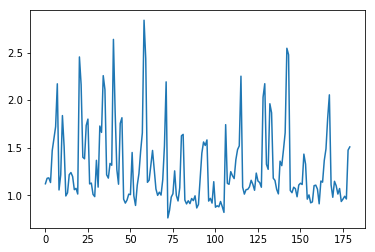

In [24]:
dists = []
for i in range(len(mfcc_arr)):
    mfcci = mfcc_arr[i]
    disti = dtw(mfcci.T, mfccTest.T,dist = lambda x, y: np.exp(np.linalg.norm(x - y, ord=1)))[0]
    dists.append(disti)
plt.plot(dists)

### Selecting the minimum distance file's class as the best match

In [25]:
min_dist = min(dists)
min_dist_index = dists.index(min_dist)
pre = int(y[min_dist_index])
print("\nSpoken word is: \n",label[pre])
print("Time used: {}s".format(time.perf_counter()-start))


Spoken word is: 
 मोर
Time used: 14.723299919000056s


### Full Testing of 20 Testing Audio Files

In [11]:
# start = time.perf_counter()
# dirname = "test3"
# files = [f for f in os.listdir(dirname) if not f.startswith('.')]
# # files.pop('desktop.ini')
# files = files[1:]
# Test_Result = []
# for j in range(len(files)):
#     start1 = time.perf_counter()
#     yTest, srTest = librosa.load(dirname+"/"+files[j])
#     mfccTest = librosa.feature.mfcc(yTest,srTest)
#     mfccTest = preprocess_mfcc(mfccTest)
#     dists = []
#     for i in range(len(mfcc_arr)):
#         mfcci = mfcc_arr[i]
#         disti = dtw(mfcci.T, mfccTest.T,dist = lambda x, y: np.exp(np.linalg.norm(x - y, ord=1)))[0]
#         dists.append(disti)
#     plt.plot(dists)
#     min_dist = min(dists)
#     min_dist_index = dists.index(min_dist)
#     label = ['हमर','काबर','मोर','टूरा','तुमन']
#     pre = int(y[min_dist_index])
#     print("\nThe input audio file is :",(dirname+"/"+files[j]))
#     print("The word spoken in this audio is: \n",label[pre])
#     Test_Result.append(label[pre])
#     print("Time taken for this recognition: {}s\n".format(time.perf_counter()-start1))
# print("\nTotal Time used for Testing for 20 Audio files: {}s".format(time.perf_counter()-start))
# print(Test_Result)